<a href="https://colab.research.google.com/github/hecshzye/food-or-not-model/blob/main/convolutional_neural_network_and_computer_vision_with_tensorflow_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Convolutional Neural Network` and `Computer Vision` with `TensorFlow`

#### This is a practice and rough work notebook for the upcoming `CNN & Computer Vision` `projects` (food-or-not-food, etc).
#### If something from this practice notes look usable or meaningful, please do not hesistate to work on it and experiment further.

Working with the `Food 101` dataset from `Kaggle` - https://www.kaggle.com/dansbecker/food-101

In [1]:
# Using a slightly modified small version of the data set which is formatted for pizza or steak modelling
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN-Computer-vision-data/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

#### Exploratory Data Analysis 

In [2]:
import os 
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f" {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

 2 directories and 0 images in 'pizza_steak' .
 2 directories and 0 images in 'pizza_steak/train' .
 0 directories and 750 images in 'pizza_steak/train/steak' .
 0 directories and 750 images in 'pizza_steak/train/pizza' .
 2 directories and 0 images in 'pizza_steak/test' .
 0 directories and 250 images in 'pizza_steak/test/steak' .
 0 directories and 250 images in 'pizza_steak/test/pizza' .


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import sklearn   # Just importing to learn more from the data whilst EDA incase.

# Analysing the training dataset
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [4]:
import matplotlib.image as mpimg
import random

def random_image_viewer(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Shape: {img.shape}")
  return img 

Shape: (382, 512, 3)


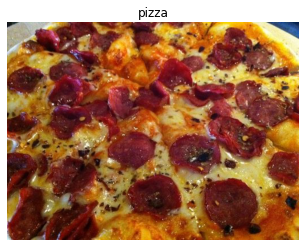

In [36]:
img = random_image_viewer(target_dir="pizza_steak/train/", target_class="pizza") # Yum!

Shape: (512, 512, 3)


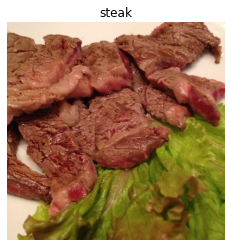

In [30]:
img = random_image_viewer(target_dir="pizza_steak/train/", target_class="steak")

#### Preprocessing (Normalization)

In [5]:
# Scaling the data (32, 224, 224, 3)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_data_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = ImageDataGenerator(rescale=1./225)

# Converting data into batches
train_data = train_data_gen.flow_from_directory("/content/pizza_steak/train",
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42)
valid_data = valid_data_gen.flow_from_directory("/content/pizza_steak/test",
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42)
# Modelling
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compiling
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 291ms/step - loss: 0.5567 - accuracy: 0.7033 - val_loss: 0.3616 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 14s 295ms/step - loss: 0.4197 - accuracy: 0.8207 - val_loss: 0.3277 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 13s 286ms/step - loss: 0.4153 - accuracy: 0.8233 - val_loss: 0.3679 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3473 - accuracy: 0.8587 - val_loss: 0.3099 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 12s 258ms/step - loss: 0.2909 - accuracy: 0.8927 - val_loss: 0.2959 - val_accuracy: 0.8780


### Trained on the backened GPU 

In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

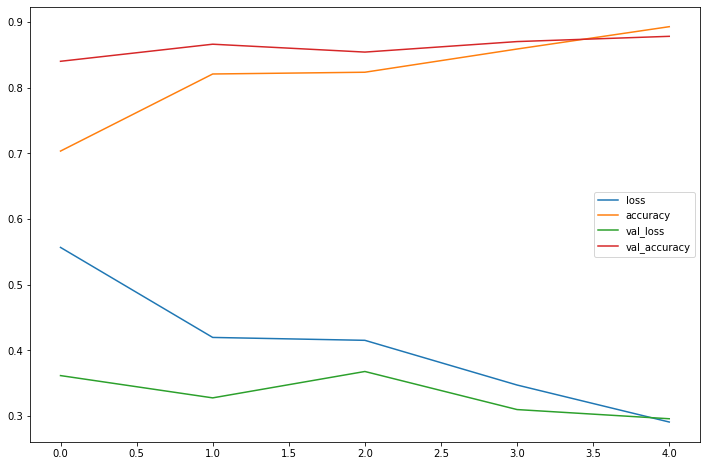

In [7]:
### Evaluating the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(12, 8));

This baseline model is not overfitting right now because the val_loss is not increasing.
Looks like the model might need some hyperparameter tuning without over-fitting.
